# Model Comparison

Code to compare different image processing models. It's reccommended to start with a faster model (less accurate) and optimise model other ways (e.g. cleaning data) before using a more accurate model

In [8]:
# Use the command git clone --depth 1 https://github.com/rwightman/pytorch-image-models.git before running
%cd C:\Users\joeh2\Fast.ai-Practical-Deep-Learning-for-Coders\pytorch-image-models\results

C:\Users\joeh2\Fast.ai-Practical-Deep-Learning-for-Coders\pytorch-image-models\results


In [9]:
# Setting things up
import pandas as pd
df_results = pd.read_csv('results-imagenet.csv')

df_results['model_org'] = df_results['model'] 
df_results['model'] = df_results['model'].str.split('.').str[0]

def get_data(part, col):
    df = pd.read_csv(f'benchmark-{part}-amp-nhwc-pt113-cu117-rtx3090.csv').merge(df_results, on='model')
    df['secs'] = 1. / df[col]
    df['family'] = df.model.str.extract('^([a-z]+?(?:v2)?)(?:\d|_|$)')
    df = df[~df.model.str.endswith('gn')]
    df.loc[df.model.str.contains('in22'),'family'] = df.loc[df.model.str.contains('in22'),'family'] + '_in22'
    df.loc[df.model.str.contains('resnet.*d'),'family'] = df.loc[df.model.str.contains('resnet.*d'),'family'] + 'd'
    return df[df.family.str.contains('^re[sg]netd?|beit|convnext|levit|efficient|vit|vgg|swin')]

df = get_data('infer', 'infer_samples_per_sec')

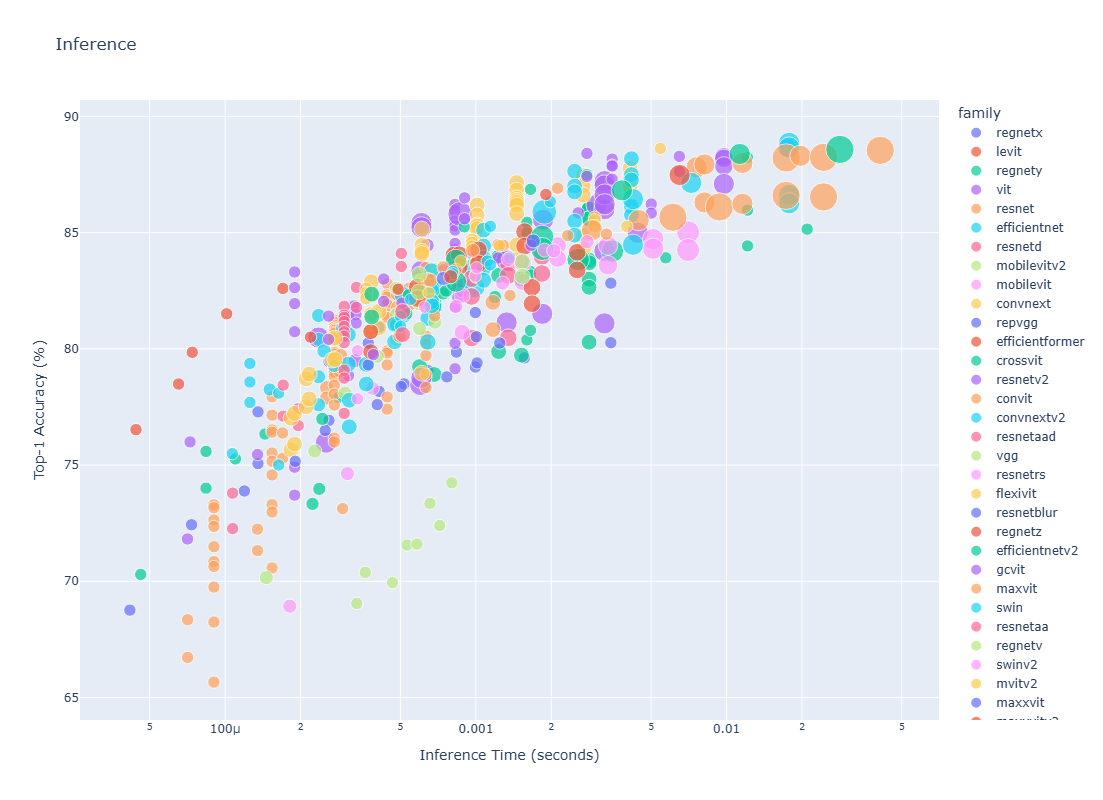

In [32]:
import plotly.express as px

w,h = 1000,800

def show_all(df, title, size):
    fig = px.scatter(df, width=w, height=h, size=df[size]**2, title=title,
        x='secs',  y='top1', log_x=True, color='family', hover_name='model_org', hover_data=[size])
    fig.update_layout(
        xaxis_title="Time to process an image (seconds)",
        yaxis_title="Accuracy (%)"
    )
    
    return fig

show_all(df, 'Inference', 'infer_img_size')

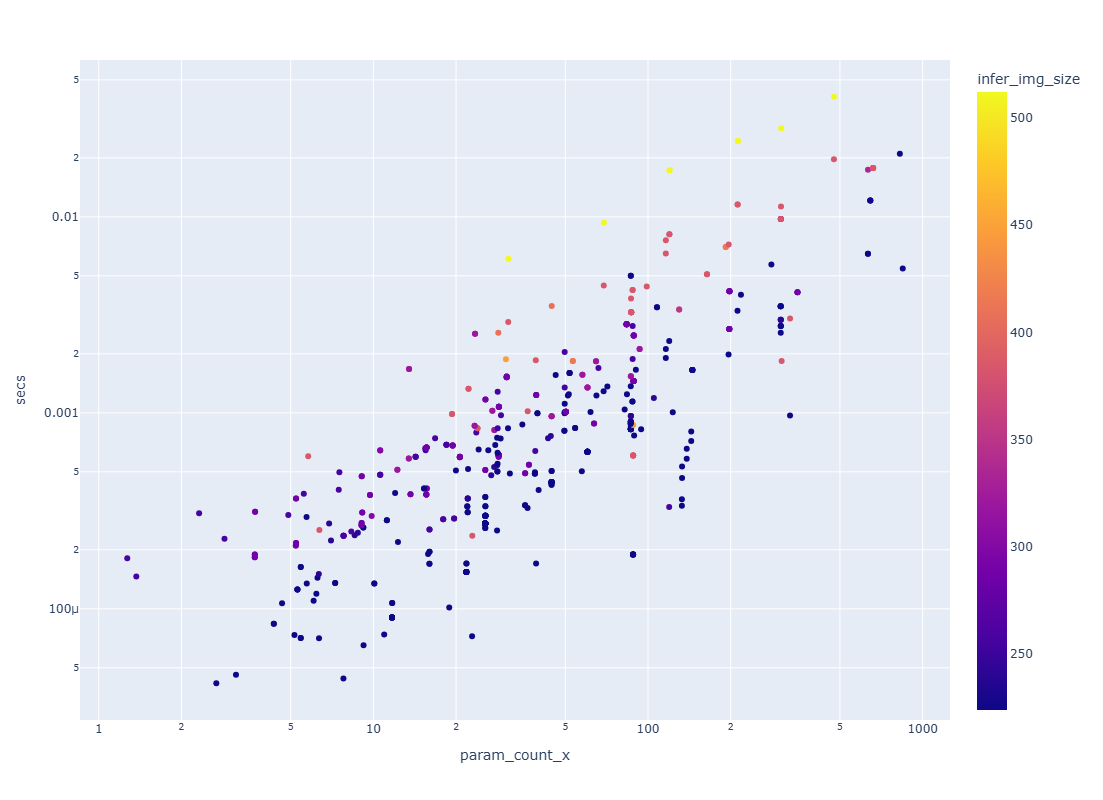

In [12]:
px.scatter(df, width=w, height=h,
    x='param_count_x',  y='secs', log_x=True, log_y=True, color='infer_img_size',
    hover_name='model_org', hover_data=['infer_samples_per_sec', 'family']
)